In [2]:
%pwd

'/home/raff/coding/switchnode-ui/greenhorn/scripts'

In [10]:
import json
import matplotlib.pyplot as plt

with open('../../bench.json') as f:
    data = json.load(f)

In [13]:
class Histogram(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.max = d['max']
        ret.min = d['min']
        ret.mean = d['mean']
        ret.len = d['len']
        ret.quantiles = d['quantiles']
        return ret
    
    def plot(self, subplot):
        width = self.max / len(self.quantiles)
        for (x,q,y) in self.quantiles:
            x = x - width / 2
            subplot.bar(x,y,width=width)

class ComponentMetric(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.time = Histogram.from_json(d['time']['hist'])
        ret.throughput = Histogram.from_json(d['throughput']['hist'])
        return ret

class Benchmark(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.components = None
        ret.root = ComponentMetric.from_json(d['root'])
        return ret

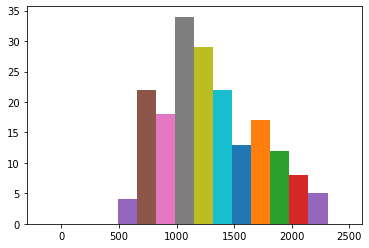

In [14]:
bench = Benchmark.from_json(data)
fig = plt.figure()
bench.root.time.plot(fig.add_subplot(1,1, 1))

In [37]:
fig.add_subplot?

In [33]:
fig.add_s

[]

In [27]:
bench = Benchmark.from_json(data)
fig = figure()
bench.root.time.plot(fig)

NameError: name 'figure' is not defined

In [3]:
data

{'components': {},
 'root': {'time': {'hist': {'len': 102,
    'max': 2597,
    'mean': 910.0882352941179,
    'min': 404,
    'quantiles': [[0.0, 0.0],
     [0.0, 0.0],
     [0.06862745098039216, 0.06862745098039216],
     [0.4215686274509804, 0.35294117647058826],
     [0.7450980392156863, 0.3235294117647059],
     [0.7647058823529411, 0.0196078431372549],
     [0.7843137254901961, 0.0196078431372549],
     [0.7843137254901961, 0.0],
     [0.803921568627451, 0.0196078431372549],
     [0.8431372549019608, 0.0392156862745098],
     [0.8823529411764706, 0.0392156862745098],
     [0.8921568627450981, 0.00980392156862745],
     [0.9607843137254902, 0.06862745098039216],
     [0.9705882352941176, 0.00980392156862745],
     [0.9705882352941176, 0.0],
     [0.9901960784313726, 0.0196078431372549]]}},
  'throughput': {'hist': {'len': 5,
    'max': 1,
    'mean': 1.0,
    'min': 1,
    'quantiles': [[0.0, 0.0], [1.0, 1.0]]}}},
 'diff': {'hist': {'len': 100,
   'max': 4243,
   'mean': 1077.0899